In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model  
from sklearn.preprocessing import PolynomialFeatures  

In [3]:
# read csv file as dataframe
# adding column names ['dim1', 'dim2','dim3'] to the dataframe
working_root = "C:/Users/victoire/Desktop/5314/"
data = pd.read_csv(working_root + "rls_data.csv", header= None)
data.columns = ['dim1','dim2','dim3']

In [4]:
x = data['dim1']
y = data['dim2']
z = data['dim3']

In [6]:
#创建系数矩阵A
a = 0
M = np.ones((10000, 6))
for i in range(0, 10000):
    M[i, 0] = (x[a])**2
    M[i, 1] = (y[a])**2
    M[i, 2] = (x[a])*(y[a])
    M[i, 3] = x[a]
    M[i, 4] = y[a]
    a = a + 1

#创建矩阵b
P = np.zeros((10000, 1))
a = 0
for i in range(0, 10000):
    P[i, 0] = z[a]
    a = a + 1

In [7]:
#OLS algo
M_T = M.T 
A = np.dot(M_T,M)
A_star = np.linalg.inv(A)
temp = np.dot(A_star,M_T)
omega= np.dot(temp, P)

In [8]:
print('The obtained fitted surface function is：z = %.3f * x^2 + %.3f * y^2 + %.3f * xy + %.3f * x + %.3f * y + %.3f'%(omega[0,0],omega[1,0],omega[2,0],omega[3,0],omega[4,0],omega[5,0]))

The obtained fitted surface function is：z = 2.000 * x^2 + 3.000 * y^2 + 5.000 * xy + 6.999 * x + 11.000 * y + 13.519


<Figure size 720x720 with 0 Axes>

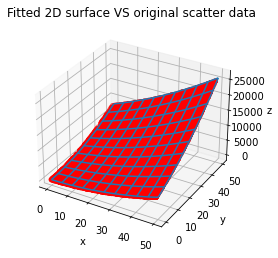

In [9]:
plt.figure(figsize=(10,10))
fig = plt.figure()
ax =fig.add_subplot(111,projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.scatter(x,y,z,c='r',marker='o')
x_p = np.linspace(0, 50, 100)
y_p = np.linspace(0, 50, 100)
x_p, y_p = np.meshgrid(x_p, y_p)
fit_surface = omega[0,0]*x_p*x_p + omega[1,0]*y_p*y_p + omega[2,0]*x_p*y_p + omega[3,0]*x_p + omega[4,0]*y_p +omega[5,0]
ax.plot_wireframe(x_p, y_p, fit_surface, rstride=10, cstride=10)
plt.title('Fitted 2D surface VS original scatter data')
plt.show()

In [10]:
R=0
for i in range(0,10000):
    R = R + (omega[0,0]*x[i]*x[i] + omega[1,0]*y[i]*y[i] + omega[2,0]*x[i]*y[i] + omega[3,0]*x[i] + omega[4,0]*y[i] + omega[5,0] - z[i])**2
print ('The variance is：%.*f'%(3,R))


The variance is：2498.518


###################################

In [18]:
M_star = data[['dim1','dim2']]
# Construct quadratic polynomial formula 
poly_reg = PolynomialFeatures(degree=2) 
# Construct linear regression model
X_poly = poly_reg.fit_transform(M_star) 
# Apply linear regression 
lin_reg_2 = linear_model.LinearRegression() 
lin_reg_2.fit(X_poly, z)


LinearRegression()

In [21]:
# regression coefficient
coe_list = 'Coefficients:',lin_reg_2.coef_
# intercept
a6 = 'intercept:',lin_reg_2.intercept_

<Figure size 720x720 with 0 Axes>

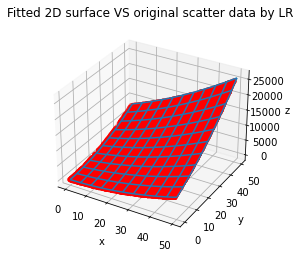

In [36]:
# Data visualization
plt.figure(figsize=(10,10))
fig = plt.figure()
ax =fig.add_subplot(111,projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.scatter(x,y,z,c='r',marker='o')
x_p = np.linspace(0, 50, 100)
y_p = np.linspace(0, 50, 100)
x_p, y_p = np.meshgrid(x_p, y_p)
fit_surface = coe_list[1][3]*x_p*x_p + coe_list[1][5]*y_p*y_p + coe_list[1][4]*x_p*y_p + coe_list[1][1]*x_p + coe_list[1][2]*y_p +coe_list[1][0] + a6[1]
ax.plot_wireframe(x_p, y_p, fit_surface, rstride=10, cstride=10)
plt.title('Fitted 2D surface VS original scatter data by LR')
plt.show()

In [37]:
# Calculate the variance
R=0
for i in range(0,10000):
    R = R + (coe_list[1][3]*x[i]*x[i] + coe_list[1][5]*y[i]*y[i] + coe_list[1][4]*x[i]*y[i] + coe_list[1][1]*x[i] + coe_list[1][2]*y[i] +coe_list[1][0] + a6[1] - z[i])**2
print ('The variance is：%.*f'%(3,R))


The variance is：2498.518
